In [2]:
import numpy as np
import pylab

In [11]:
def xk(k, z):
    return z**k / (k + np.sqrt(k) - 1)

In [13]:
x1 = -1
x2 = complex(0, 1)
x3 = np.e**complex(0, 3 * np.pi / 4)
x4 = np.e**complex(0, np.pi / 4)

In [18]:
def fun(z):
    return np.sum([xk(k,z) for k in range(10000000, 0, -1)])

In [27]:
xs = [x1, x2,x3,x4]
fs = [fun(x) for x in xs]
for f, x in zip(fs,xs):
    print("f({}) = {}".format(x, f))

f(-1) = -0.741624260422015
f(1j) = (-0.2916586461824229+0.826911417539644j)
f((-0.7071067811865475+0.7071067811865476j)) = (-0.6316343793587099+0.44231800545905464j)
f((0.7071067811865476+0.7071067811865476j)) = (0.3555479189891632+1.0991724629850734j)


In [67]:
def add(d1, d2, d3):
    return (d1 - d2)**2 / (d1 + d3 - 2 * d2)


def eitken(sqs):
    newsqs = list(sqs[:2])
    for i in range(2, len(sqs)):
        a = add(sqs[i], sqs[i - 1], sqs[i - 2])
        newsqs.append(sqs[i] - a)
    return newsqs

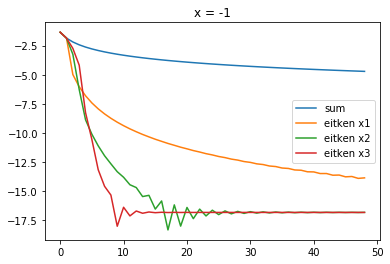

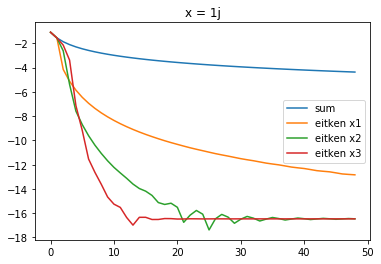

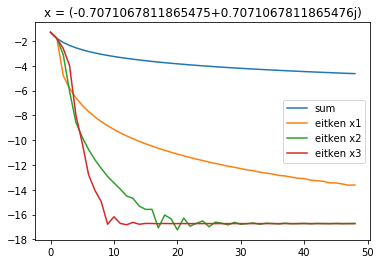

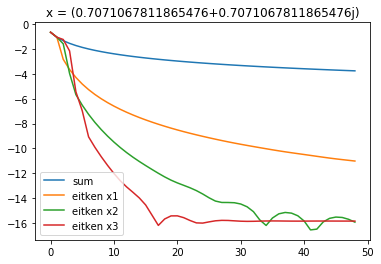

In [69]:
for x, f in zip(xs, fs):
    sqs = np.cumsum([xk(k, x) for k in range(1, 50)])
    er = [np.log(abs(s - f)) for s in sqs]
    pylab.plot(np.arange(len(sqs)), er, label="sum")
    for j in range(1, 4):
        sqs = eitken(sqs)
        er = [np.log(abs(s - f)) for s in sqs]
        pylab.plot(np.arange(len(sqs)), er, label="eitken x{}".format(j))
    pylab.title("x = {}".format(x))
    pylab.legend()
    pylab.show()